In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from bokeh.charts import Donut, show, output_file

%matplotlib inline
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_colwidth', 200)

In [28]:
data=pd.read_csv('/Volumes/Data/Dropbox/ANIP/Centro de estudios/Encuesta de insercion 2016/20170103094151-SurveyExport.csv', encoding='utf-8-sig', low_memory=False)

#Print all the column names
#list(data)

In [3]:
print('Personas que participaron: ', len(data))
print('Personas que completaron la encuesta: ', len(data[data['Status'].str.contains('Complete')]))

Personas que participaron:  1433
Personas que completaron la encuesta:  791


In [4]:
#Create data_complete that corresponds to surveys that were totally completed
data_complete=data[data['Status'].str.contains('Complete')].copy()

#Inspecting data_complete [status]
data_complete['Status']

0       Complete
3       Complete
4       Complete
6       Complete
7       Complete
9       Complete
10      Complete
12      Complete
13      Complete
15      Complete
16      Complete
18      Complete
19      Complete
24      Complete
26      Complete
          ...   
1406    Complete
1408    Complete
1412    Complete
1414    Complete
1415    Complete
1417    Complete
1418    Complete
1419    Complete
1420    Complete
1421    Complete
1422    Complete
1426    Complete
1427    Complete
1428    Complete
1431    Complete
Name: Status, dtype: object

In [5]:
data_complete['Edad']=data_complete['¿Cuál es su edad? Exprésela en años']
#Convert age to numeric
data_complete.loc[:,'Edad'] = data_complete['Edad'].apply(pd.to_numeric)

data_complete['Pais residencia']=data_complete['País:Indique el País y Ciudad donde reside'].copy()
data_complete['Pais residencia'].fillna('Chile', inplace=True)
data_complete['Pais residencia']

data_complete['Nacionalidad']=data_complete['¿Cuál es su nacionalidad?']

data_complete['Postgrado en curso']=data_complete['¿Está cursando actualmente algún programa de Postgrado ya sea en Chile o el Extranjero?']
data_complete['Postgrado finalizado']=data_complete['¿Tiene ya algún grado académico de Postgrado obtenido ya sea en Chile o el Extranjero?']
data_complete['Postdoc en curso']=data_complete['¿Está haciendo actualmente algún Postdoctorado ya sea en Chile o el Extranjero?']
data_complete['Postdoc finalizado']=data_complete['¿Terminó ya algún Postdoctorado ya sea en Chile o el Extranjero?']

data_complete['Postgrado en curso - Magister']=data_complete['Magíster (MSc):Elija los tipos de programas de Postgrado que está cursando actualmente']
data_complete['Postgrado en curso - Doctorado']=data_complete['Doctorado (PhD):Elija los tipos de programas de Postgrado que está cursando actualmente']
data_complete['Postgrado finalizado - Magister']=data_complete['Magíster (MSc):Elija los grados académicos de Postgrado que tiene actualmente']
data_complete['Postgrado finalizado - Doctorado']=data_complete['Doctorado (PhD):Elija los grados académicos de Postgrado que tiene actualmente']

data_complete['Numero empleos']=data_complete['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']
#Convert number of employments to numeric
data_complete.loc[:,'Numero empleos']=data_complete['Numero empleos'].replace('5 o más','5').apply(pd.to_numeric)

data_complete['Empleabilidad - Magister']=data_complete['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)']
data_complete['Empleabilidad - Doctorado']=data_complete['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)']
data_complete['Empleabilidad - Postdoc']=data_complete['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.']

In [6]:
#Remove html tags from Tipo de contrato
data_complete['Tipo de contrato']=data_complete['¿Qué tipo de relación laboral tiene en este trabajo?/1']
data_complete['Tipo de contrato'].fillna('', inplace=True)

for i in data_complete.index:
    text=data_complete.loc[i,'Tipo de contrato']
    soup = BeautifulSoup(text, "html.parser")
    for match in soup.findAll('span'):
        match.decompose()
    data_complete.loc[i,'Tipo de contrato']=soup.get_text()
    
data_complete['Tipo de contrato']

0             Contrato de trabajo a plazo fijo
3                        Contrato a honorarios
4                           Acuerdo de palabra
6                        Contrato a honorarios
7       Contrato de trabajo a plazo indefinido
9                                             
10            Contrato de trabajo a plazo fijo
12      Contrato de trabajo a plazo indefinido
13                                            
15      Contrato de trabajo a plazo indefinido
16                       Contrato a honorarios
18                          Acuerdo de palabra
19                          Acuerdo de palabra
24                                            
26                                        Otra
                         ...                  
1406                                          
1408                                          
1412                                          
1414                     Contrato a honorarios
1415                                          
1417         

## Now the plots

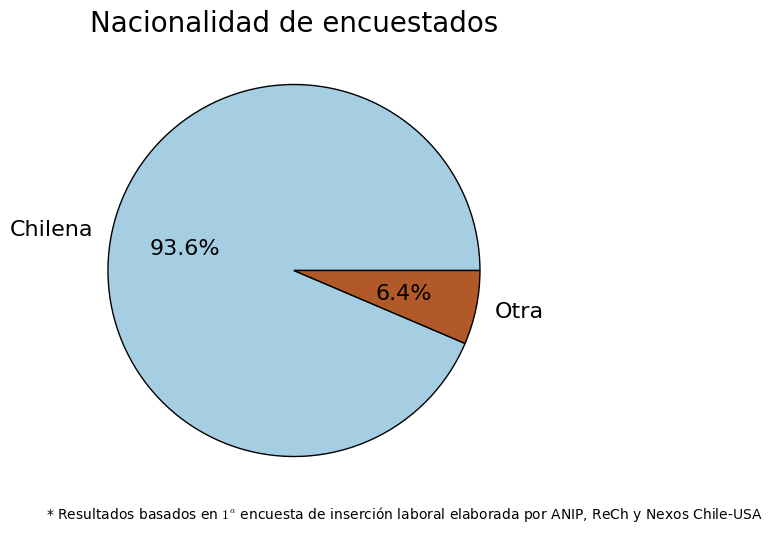

In [7]:
data_plot=data_complete['Nacionalidad'].value_counts()

data_plot.plot.pie(colormap='Paired', autopct='%.1f%%', fontsize=16, figsize=(6, 6))
plt.title('Nacionalidad de encuestados', fontsize=20)
plt.axes().set_ylabel('')
plt.figtext(0.1, 0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_nacionalidad.pdf', bbox_inches='tight')

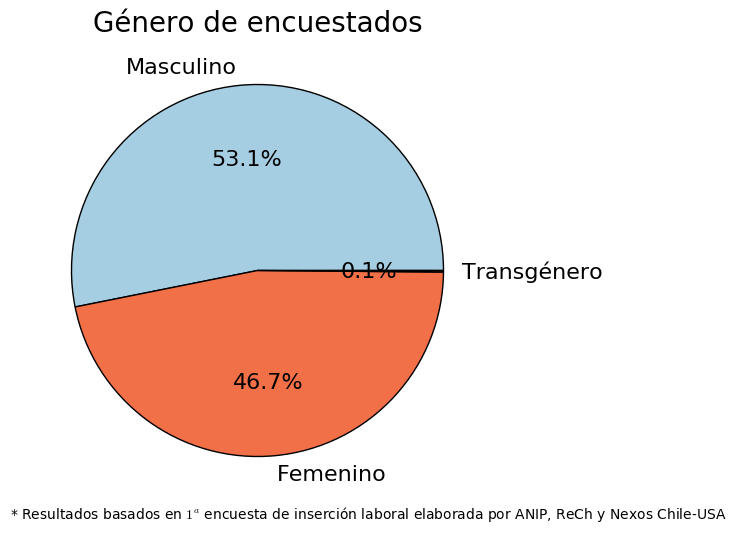

In [8]:
data_plot=data_complete['Género'].value_counts()

data_plot.plot.pie(colormap='Paired', autopct='%.1f%%', fontsize=16, figsize=(6, 6))
plt.title('Género de encuestados', fontsize=20)
plt.axes().set_ylabel('')
plt.figtext(0.1, 0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_genero.pdf', bbox_inches='tight')

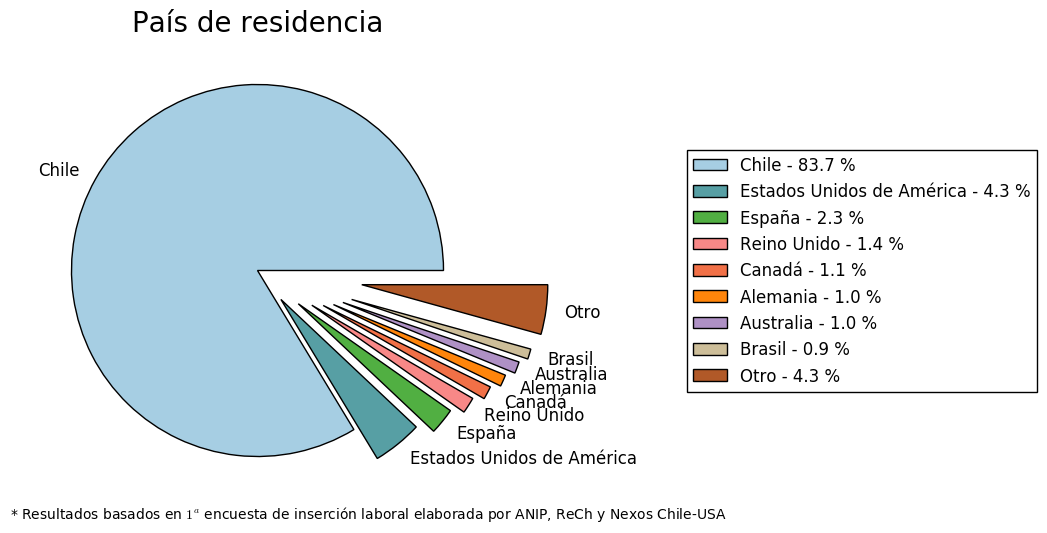

In [9]:
data_top=data_complete['Pais residencia'].value_counts()[0:8]
data_others=pd.Series([np.sum(data_complete['Pais residencia'].value_counts()[8:-1].values)], index=['Otro'])

# Concatenate top 5 and other countries
data_plot=pd.concat([data_top,data_others])

porcent= data_plot.values/np.sum(data_plot.values)*100.
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(data_plot.index, porcent)]

explode = np.sqrt(np.arange(len(data_plot)))*0.2
data_plot.plot(kind='pie', explode=explode, labeldistance=1.1, colormap='Paired', fontsize=12, figsize=(6, 6))
#patches, texts = plt.pie(data_plot.values, startangle=0, radius=1.)
plt.axes().set_ylabel('')
plt.title('País de residencia', fontsize=20)
plt.legend(labels=labels, loc="center", bbox_to_anchor=(1.8, 0.5))
plt.figtext(0.1, 0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_pais_residencia.pdf', bbox_inches='tight')

In [10]:
data_age=data_complete['Edad'].groupby([data_complete['Género'], data_complete['Postgrado en curso'], data_complete['Postgrado finalizado'], data_complete['Postdoc en curso'], data_complete['Postdoc finalizado']]).agg(["count","mean"])

data_age.reset_index(inplace=True)
data_age.rename(columns={'count':'Número de investigadores', 'mean':'Edad promedio'}, inplace=True)
data_age.loc[:,'Edad promedio']=data_age['Edad promedio'].round(1)

print(type(data_age))
print(data_age.columns.tolist())
print(data_age.index)

data_age.sort_values('Número de investigadores', ascending=False)

<class 'pandas.core.frame.DataFrame'>
['Género', 'Postgrado en curso', 'Postgrado finalizado', 'Postdoc en curso', 'Postdoc finalizado', 'Número de investigadores', 'Edad promedio']
RangeIndex(start=0, stop=19, step=1)


,Género,Postgrado en curso,Postgrado finalizado,Postdoc en curso,Postdoc finalizado,Número de investigadores,Edad promedio
2,Femenino,No,Sí,No,No,130,35.6
11,Masculino,No,Sí,No,No,120,35.0
12,Masculino,No,Sí,No,Sí,96,36.9
4,Femenino,No,Sí,Sí,No,62,34.9
17,Masculino,Sí,Sí,No,No,58,32.4
13,Masculino,No,Sí,Sí,No,56,33.5
7,Femenino,Sí,Sí,No,No,52,33.8
3,Femenino,No,Sí,No,Sí,47,37.8
6,Femenino,Sí,No,No,No,37,32.3
14,Masculino,No,Sí,Sí,Sí,36,35.1


In [11]:
data_gender=data_complete[['Género','Edad','Postgrado en curso','Postgrado finalizado','Postdoc en curso','Postdoc finalizado']]

data_plot=pd.DataFrame(columns=['Femenino','Masculino','Transgénero'])
data_plot_lower=pd.DataFrame(columns=['Femenino','Masculino','Transgénero'])
data_plot_higher=pd.DataFrame(columns=['Femenino','Masculino','Transgénero'])

for k in data_gender.keys():
    if (k != 'Género') & (k != 'Edad'):
        data_plot=data_plot.append(data_gender[data_gender[k].str.contains('Sí', na = False)].groupby('Género')[k].count())
        data_plot_lower=data_plot_lower.append(data_gender[(data_gender[k].str.contains('Sí', na = False)) & (data_gender['Edad'] < 35)].groupby('Género')[k].count())
        data_plot_higher=data_plot_higher.append(data_gender[(data_gender[k].str.contains('Sí', na = False)) & (data_gender['Edad'] >= 35)].groupby('Género')[k].count())
        
print(data_plot)
print(data_plot_lower)
print(data_plot_higher)

                      Femenino  Masculino  Transgénero
Postgrado en curso        92.0       91.0          NaN
Postgrado finalizado     306.0      366.0          1.0
Postdoc en curso          77.0       93.0          NaN
Postdoc finalizado        61.0      133.0          1.0
                      Femenino  Masculino  Transgénero
Postgrado en curso        61.0       66.0          NaN
Postgrado finalizado     139.0      183.0          NaN
Postdoc en curso          39.0       53.0          NaN
Postdoc finalizado        17.0       44.0          NaN
                      Femenino  Masculino  Transgénero
Postgrado en curso        31.0       25.0          NaN
Postgrado finalizado     167.0      183.0          1.0
Postdoc en curso          38.0       40.0          NaN
Postdoc finalizado        44.0       89.0          1.0


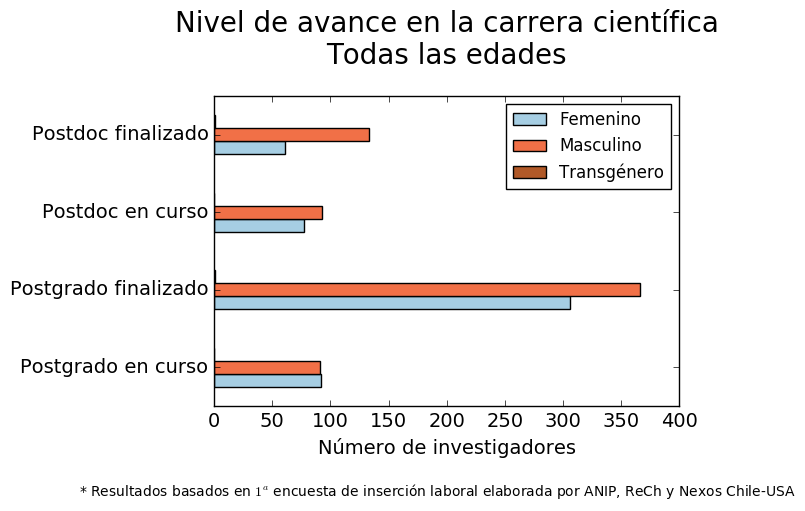

In [12]:
data_plot.plot(kind="barh", colormap='Paired', fontsize=14)
plt.title('Nivel de avance en la carrera científica\nTodas las edades', fontsize=20, y=1.08)
plt.xlabel('Número de investigadores', fontsize=14)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/nivel_avance_carrera_cientifica.pdf', bbox_inches='tight')
plt.savefig('figures/nivel_avance_carrera_cientifica.png', bbox_inches='tight')

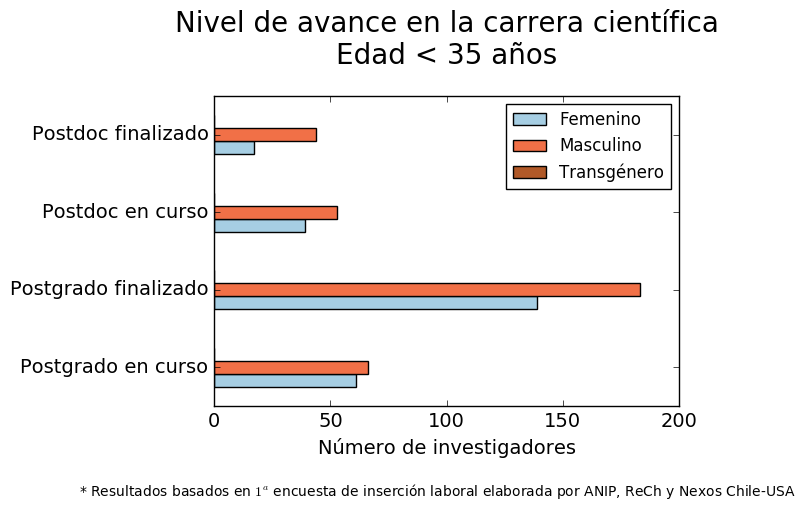

In [13]:
data_plot_lower.plot(kind="barh", colormap='Paired', fontsize=14)
plt.title('Nivel de avance en la carrera científica\nEdad < 35 años', fontsize=20, y=1.08)
plt.xlabel('Número de investigadores', fontsize=14)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/nivel_avance_carrera_cientifica_edad<35.pdf', bbox_inches='tight')

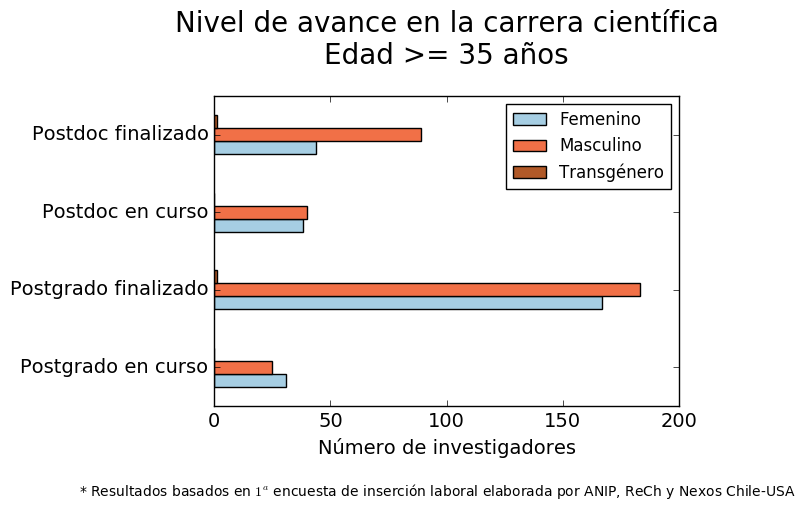

In [14]:
data_plot_higher.plot(kind="barh", colormap='Paired', fontsize=14)
plt.title('Nivel de avance en la carrera científica\nEdad >= 35 años', fontsize=20, y=1.08)
plt.xlabel('Número de investigadores', fontsize=14)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/nivel_avance_carrera_cientifica_edad>35.pdf', bbox_inches='tight')

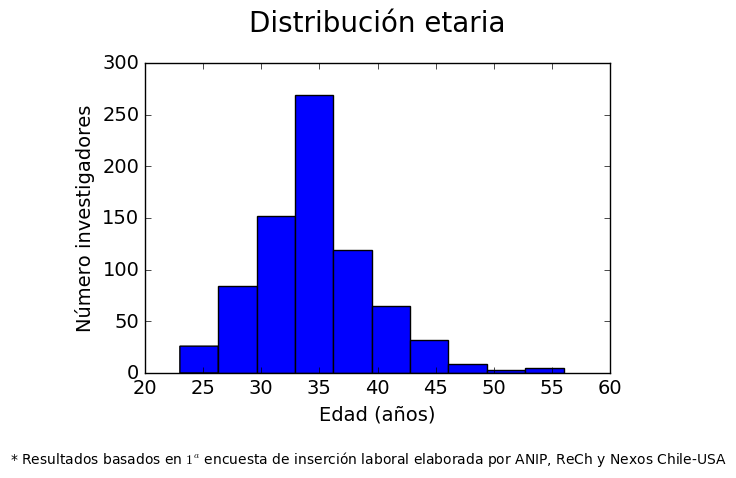

In [15]:
data_complete['¿Cuál es su edad? Exprésela en años'].plot.hist(fontsize=14)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Número investigadores', fontsize=14)
plt.title('Distribución etaria', fontsize=20,  y=1.08)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_edad.pdf', bbox_inches='tight')

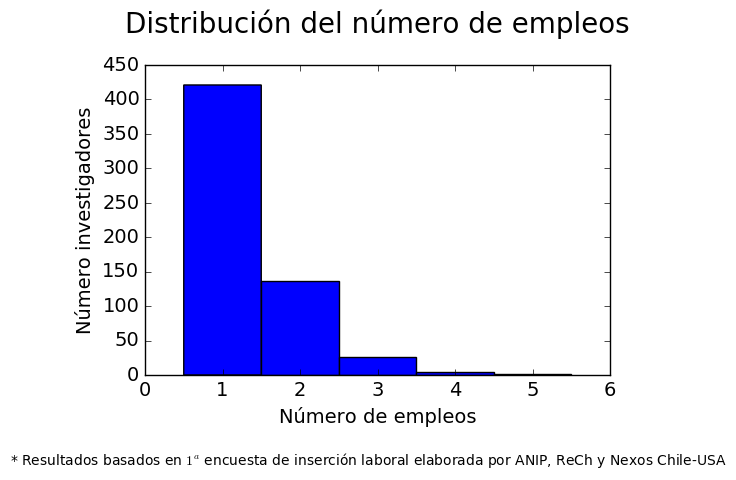

In [16]:
data_complete['Numero empleos'].plot.hist(bins=5, range=(0.5,5.5), fontsize=14)
plt.xlabel('Número de empleos', fontsize=14)
plt.ylabel('Número investigadores', fontsize=14)
plt.title('Distribución del número de empleos', fontsize=20, y=1.08)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_numero_empleos.pdf', bbox_inches='tight')

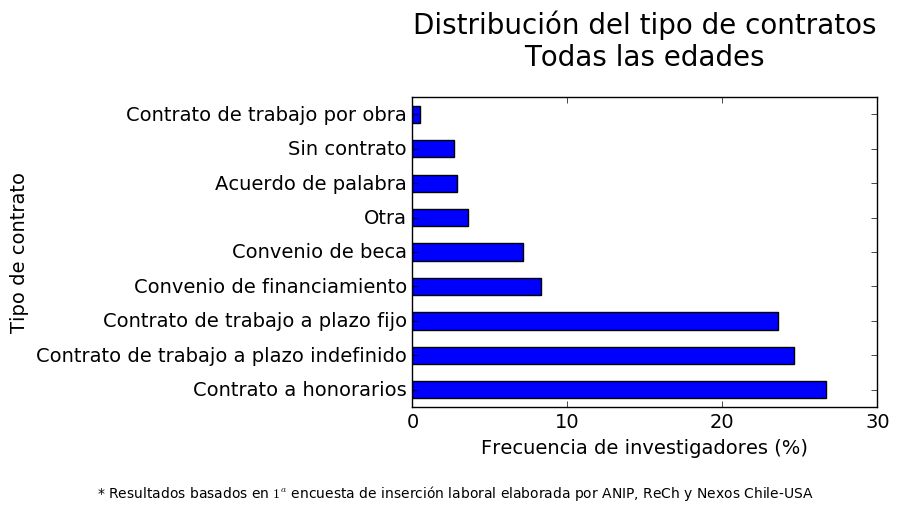

In [17]:
data_plot=data_complete['Tipo de contrato'][data_complete['Numero empleos']>0]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xticks(np.arange(0, 31, 10))

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Frecuencia de investigadores (%)', fontsize=14)
plt.title('Distribución del tipo de contratos\nTodas las edades', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato.pdf', bbox_inches='tight')

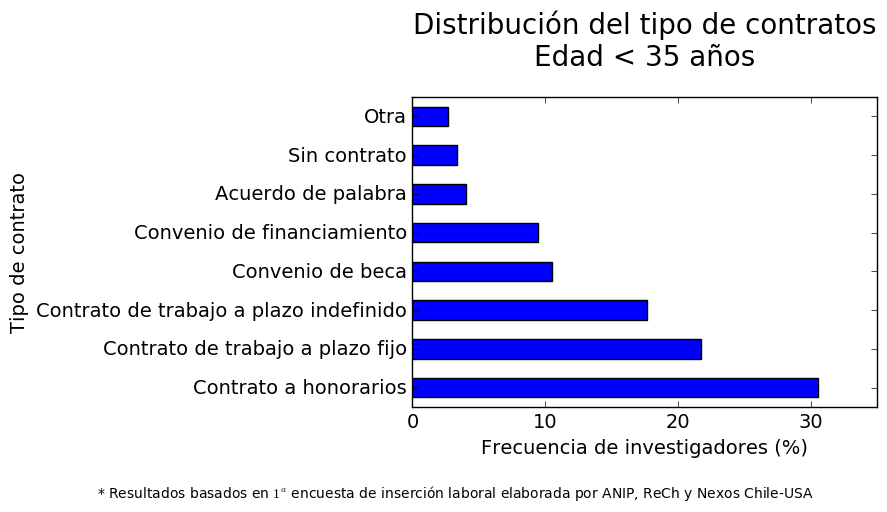

In [18]:
data_plot=data_complete['Tipo de contrato'][(data_complete['Numero empleos']>0) & (data_complete['Edad']<35)]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xticks(np.arange(0, 31, 10))

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Frecuencia de investigadores (%)', fontsize=14)
plt.title('Distribución del tipo de contratos\nEdad < 35 años', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato_edad<35.pdf', bbox_inches='tight')

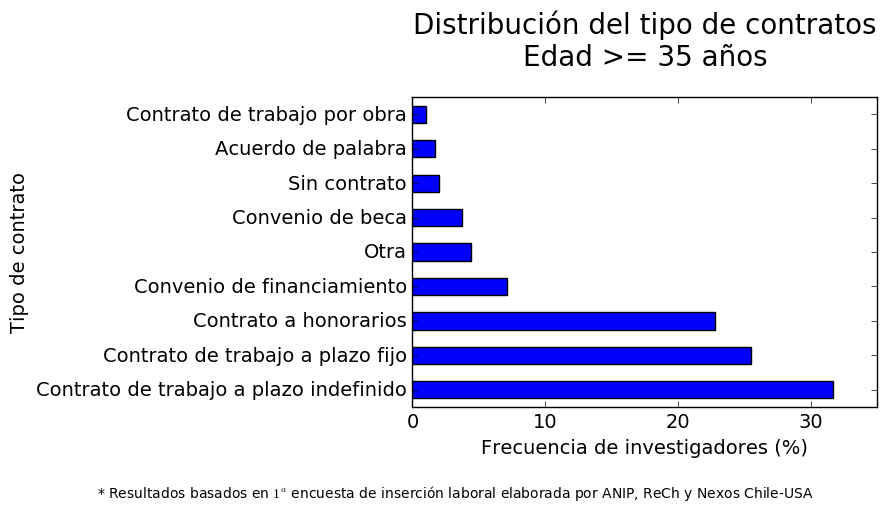

In [19]:
data_plot=data_complete['Tipo de contrato'][(data_complete['Numero empleos']>0) & (data_complete['Edad']>=35)]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xticks(np.arange(0, 31, 10))

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Frecuencia de investigadores (%)', fontsize=14)
plt.title('Distribución del tipo de contratos\nEdad >= 35 años', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato_edad>35.pdf', bbox_inches='tight')

In [20]:
data_unemployed=data_complete[ (data_complete['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_complete['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_complete['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_complete.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_complete.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  42
Numero de total de investigadores:  791
Porcentaje:  5.3 %


In [21]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 30]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  0
Numero de total de investigadores:  110
Porcentaje:  0.0 %


In [22]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 35]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  13
Numero de total de investigadores:  396
Porcentaje:  3.3 %


In [23]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 40]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  35
Numero de total de investigadores:  650
Porcentaje:  5.4 %


In [24]:
data_age=data_complete[ (data_complete['¿Cuál es su edad? Exprésela en años'] < 40) & (data_complete['Género'] == 'Femenino')]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Genero Femenino')
print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Genero Femenino
Numero de investigadores que se declaran desempleados:  21
Numero de total de investigadores:  303
Porcentaje:  6.9 %


In [25]:
data_age=data_complete[ (data_complete['¿Cuál es su edad? Exprésela en años'] < 40) & (data_complete['Género'] == 'Masculino')]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Genero Masculino')
print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Genero Masculino
Numero de investigadores que se declaran desempleados:  14
Numero de total de investigadores:  346
Porcentaje:  4.0 %
